# House Price Prediction in King County


## Business Understanding


### Problem Statement

As a junior data scientist in a real estate company in King county that helps homeowners to sell and buy houses,my first project was to determine 

and analyse the  factors affecting the house prices and further build a pricing algorithm for the houses based on the factors.The goal is to help 

the agency advice homeowners on the factors that might increase the estimated value of their homes and by what amount.

### Objectives

* Which factors affect house prices?

* Which house atributes increase sale price?

* What is the average cost of a house?



## Data Understanding

### Loading the data


In [59]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
#Loading data
Houses = pd.read_csv("/home/elsie/Downloads/kc_house_data.csv")
Houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [61]:
#Cheking the shape of my dataset
print('My housing dataset has ',Houses.shape[0],' rows and ',Houses.shape[1],' Columns.')

My housing dataset has  21597  rows and  21  Columns.


In [62]:
#Checking the column datatypes
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* From the dataset most of the columns have the required datatypes except from sqft basement which contains float datatpe yet type object,date columns which contains object data type yet type datetime object and yr_renovated which contains float datatype yet should be numeric.

* Three columns seem to have missing values,these are waterfront,view and yr_renovated.

## Data Preparation

### Data Cleaning


In [63]:
Houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [64]:
#Dropping columns am not going to use
Houses_df = Houses.drop(columns=['id','zipcode','sqft_living15','sqft_lot15','lat','long','view','sqft_above'])
Houses_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,0.0,1955,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,NaN
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0


#### Dealing with missing values

In [65]:
#Checking and dealing with missing values
Houses_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

In [66]:
#Percentage of missing values
for col in ['waterfront','yr_renovated']:
    missing = ((Houses_df[col].isna().sum()/len(Houses_df[col])))*100
    print(f"{col}:{round(missing,2)}")

waterfront:11.0
yr_renovated:17.79


In [67]:
Houses_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [68]:
Houses_df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [69]:
#Getting statistics of the columns with missing values
Houses_df[['waterfront','yr_renovated']].describe()

,waterfront,yr_renovated
count,19221.000000,17755.000000
mean,0.007596,83.636778
std,0.086825,399.946414
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,2015.000000


* From the stats it is safe to replace the missing values with 0,since waterfront column is a categorical variable that indicates whether a house  
has a waterfront or not.Also the house is either renovated or not,missing values could indicate that the house was not renovated.

In [70]:
#Creating a function to replace the missing values with zero
def replace_missing (df):
    df.fillna(0,inplace = True)
    return df


In [71]:
Houses_df = replace_missing(Houses_df)
#Check missing values
Houses_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

#### Changing column datatypes

In [72]:
#Changing column datatypes
#Converting date  column to datetime object
Houses_df['date']= pd.to_datetime(Houses_df['date'])
Houses_df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [73]:
#Creating a column to get the month houses were sold
Houses_df['month_sold'] = Houses_df['date'].dt.month_name()
Houses_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,month_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,October
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,December
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,February
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,December
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,February


In [74]:
#converting year_renovated column to numeric
Houses_df['yr_renovated'] = Houses_df['yr_renovated'].astype('int')
Houses_df.dtypes


date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
condition                 int64
grade                     int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
month_sold               object
dtype: object

In [75]:
#Creating a column to get the age of the houses as of 2015
Houses_df['house_age'] = Houses_df['yr_built'].apply(lambda y:2015-y)
Houses_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,month_sold,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0,October,60
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991,December,64
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0,February,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0,December,50
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0,February,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0,May,6
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0,February,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0,June,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0,January,11


In [76]:
#creating a column to get the age of houses since they were last renovated
Houses_df['renovation_age'] = Houses_df['yr_renovated'].apply(lambda y:0 if y == 0 else 2015-y)
Houses_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,month_sold,house_age,renovation_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0,October,60,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991,December,64,24
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0,February,82,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0,December,50,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0,February,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0,May,6,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0,February,1,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0,June,6,0
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0,January,11,0


In [77]:
#Dropping year built and year renovated and use age for my analysis
Houses_df1 = Houses_df.drop(columns = ['yr_built','yr_renovated'])
Houses_df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,month_sold,house_age,renovation_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,October,60,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,December,64,24
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,February,82,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,December,50,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,February,28,0


In [78]:
Houses_df1.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [79]:
Houses_df1['bathrooms'].describe()
#Bathroom values have decimal values

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

* Bathroom column  contains values of total number of bathrooms per bedroom. It has decimal places with the median being 2.25,and maximum value beimg 8 which does not make much sense,However on further research I found out that the floating point could indicate say a toilet with no shower or bathtub.

* For ease of analysis I will round off the value to the nearest integer

In [80]:
#round off bathroom values 
Houses_df1['bathrooms'] = Houses_df1['bathrooms'].map(lambda x: int(round(x,0)))
Houses_df1['bathrooms'].describe()

count    21597.000000
mean         2.059777
std          0.754435
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64

In [81]:
#Checking for duplicates
duplicates = Houses_df[Houses_df.duplicated()]
len(duplicates)

0

#### Cheking for outliers


In [82]:
Houses_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,house_age,renovation_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,44.000324,0.656989
std,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,4.524506
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,64.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,115.000000,81.000000


In [83]:
Houses_df1.sqft_basement.value_counts()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
         ...  
915.0        1
65.0         1
207.0        1
906.0        1
415.0        1
Name: sqft_basement, Length: 304, dtype: int64

* The basement column has rows that has question marks as values that is why its statistics were not coming up.

* I will replace the question mark with 0 as most of the values were 0

In [88]:
#Replacing the question mark with 0 and converting the whole column to numeric datatype
Houses_df1['sqft_basement'].replace({'?' : 0.0},inplace=True)
Houses_df1.sqft_basement.value_counts()
Houses_df1['sqft_basement'] = pd.to_numeric(Houses_df1['sqft_basement'])

In [95]:
statistics = Houses_df1.describe()
statistics

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,house_age,renovation_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,285.716581,44.000324,0.656989
std,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,439.819830,29.375234,4.524506
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,550.000000,64.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,115.000000,81.000000


* Now we see the basement column statistics

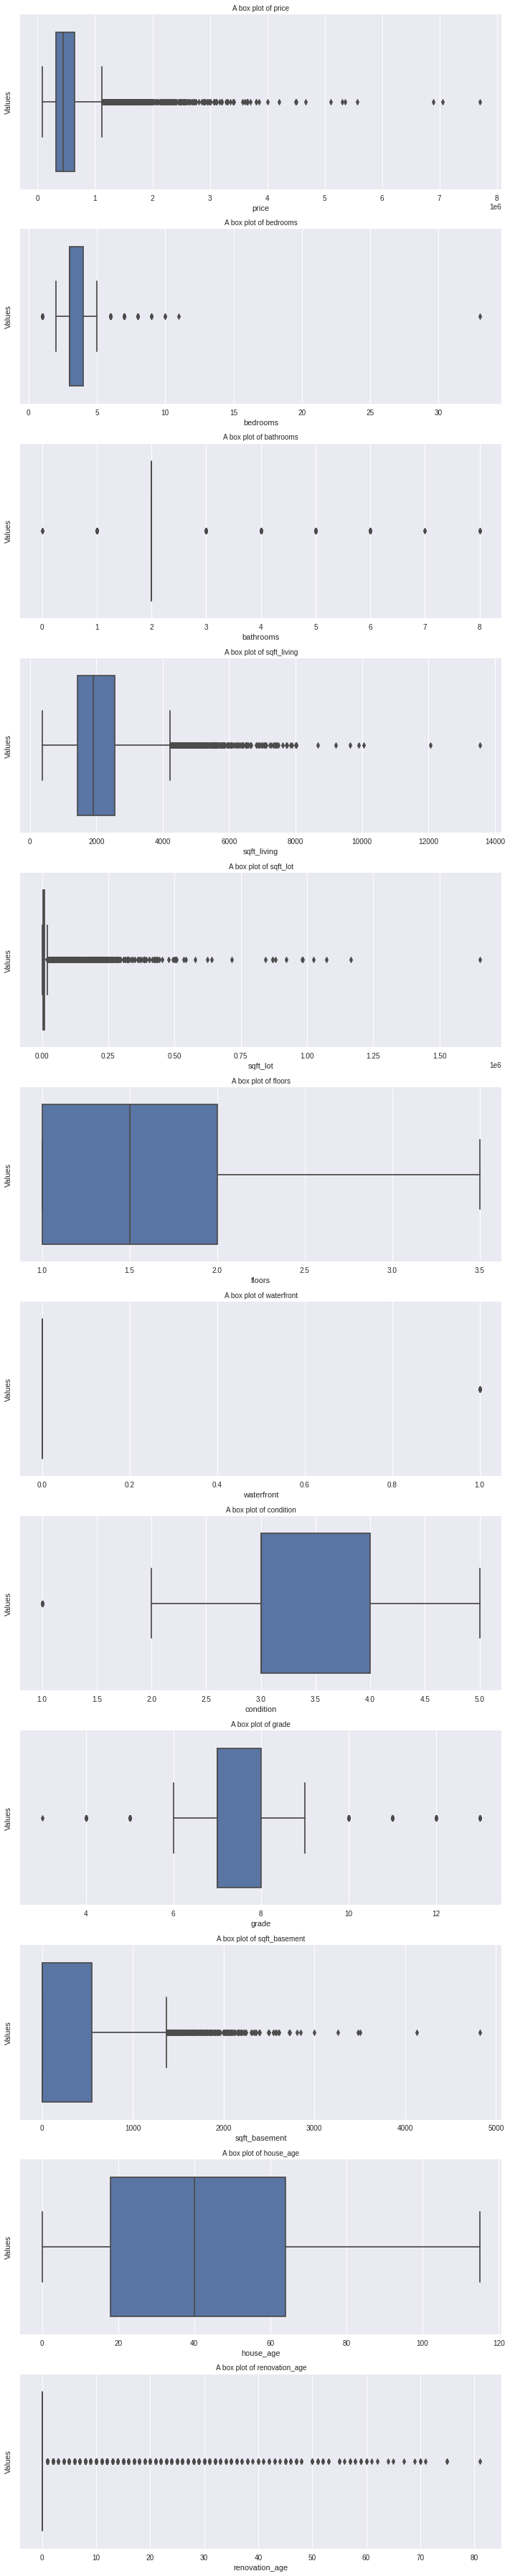

In [98]:
#Creating box plots to show if there are outlier
fig,ax=plt.subplots(len(statistics.columns),figsize=(10,50))
fig.set_tight_layout(True)
for i,col_vals in enumerate(statistics.columns):
  sns.boxplot(x = Houses_df1[col_vals], ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show()

* All the columns have outliers except the house age column

In [131]:
#Using the IQR to get rid of outliers.
cols1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'sqft_basement']

Q1 = Houses_df1[cols1].quantile(0.25)
Q3 = Houses_df1[cols1].quantile(0.75)
IQR = Q3 - Q1

data = Houses_df1[~((Houses_df1[cols1] < (Q1 - 1.5 * IQR)) |(Houses_df1[cols1] > (Q3 + 1.5 * IQR))).any(axis=1)]  
data     

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,month_sold,house_age,renovation_age
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0.0,3,7,400.0,December,64,24
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0.0,3,8,0.0,February,28,0
6,2014-06-27,257500.0,3,2,1715,6819,2.0,0.0,3,7,0.0,June,20,0
7,2015-01-15,291850.0,3,2,1060,9711,1.0,0.0,3,7,0.0,January,52,0
9,2015-03-12,323000.0,3,2,1890,6560,2.0,0.0,3,7,0.0,March,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,2014-10-14,610685.0,4,2,2520,6023,2.0,0.0,3,9,0.0,October,1,0
21591,2015-02-19,475000.0,3,2,1310,1294,2.0,0.0,3,8,130.0,February,7,0
21592,2014-05-21,360000.0,3,2,1530,1131,3.0,0.0,3,8,0.0,May,6,0
21593,2015-02-23,400000.0,4,2,2310,5813,2.0,0.0,3,8,0.0,February,1,0


## Exploratory Data Analysis

## Univariate analysis

/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsi

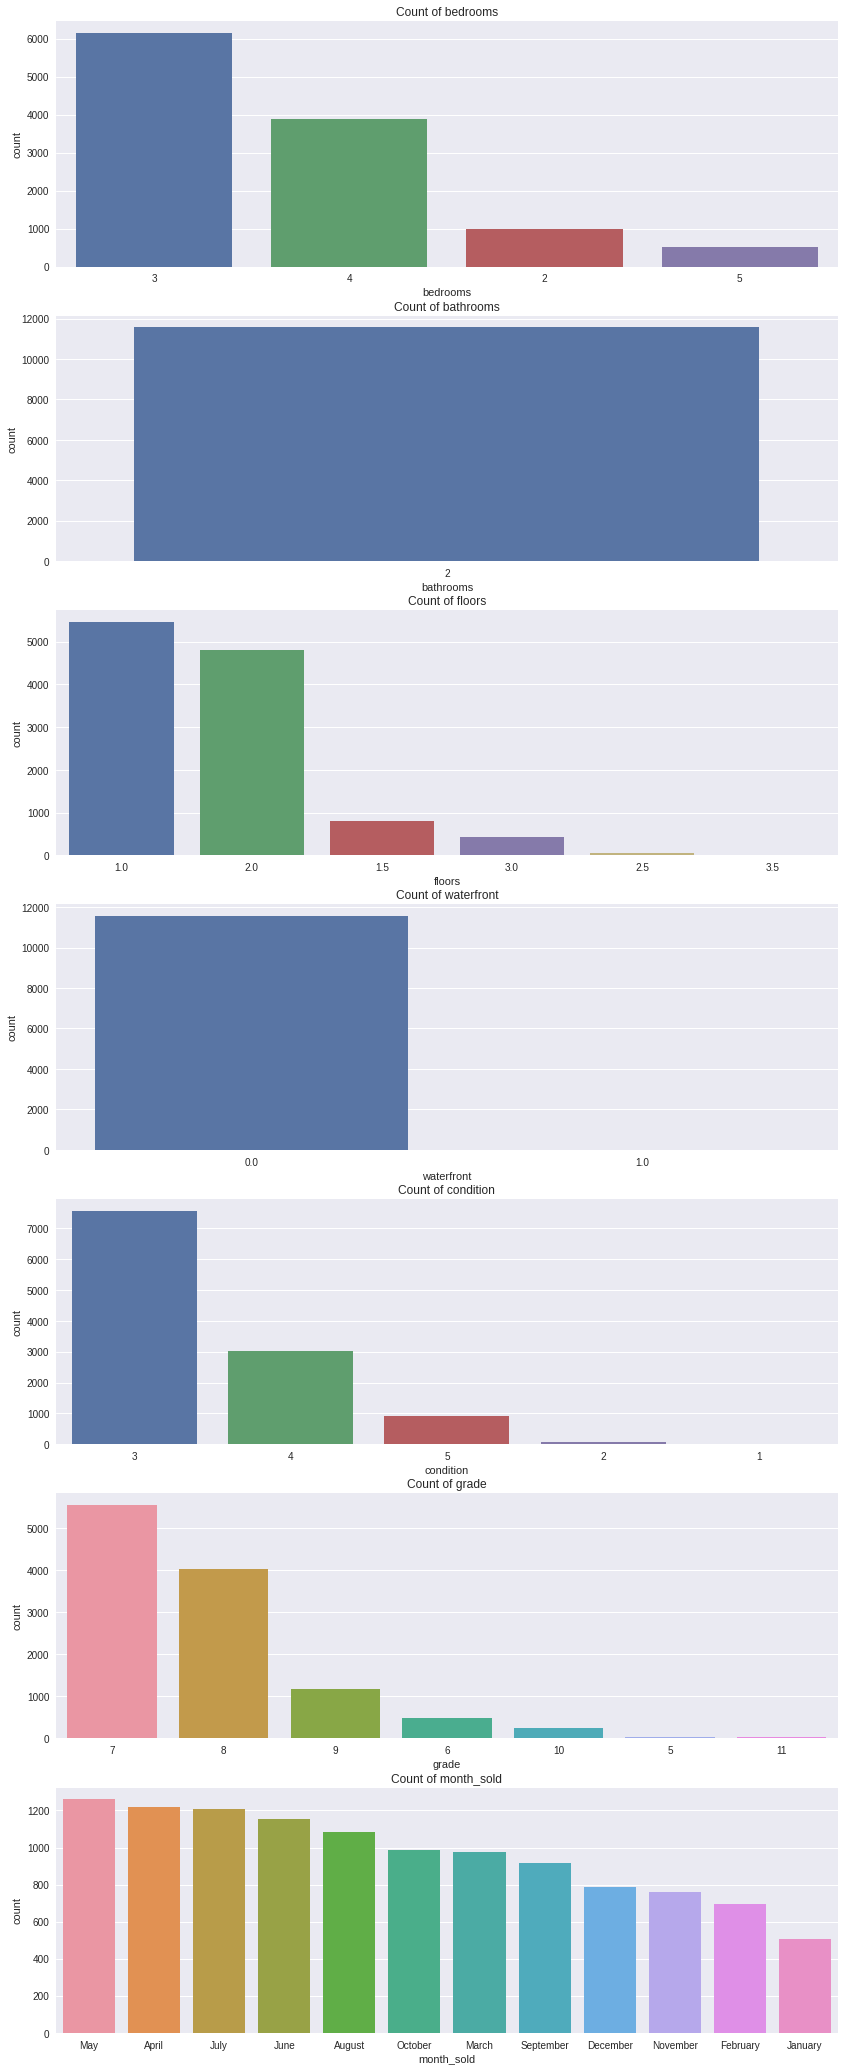

In [124]:
#ditributions of categorical variables
categoricals = ['bedrooms','bathrooms','floors','waterfront','condition','grade','month_sold']

#creating a function 
def plot_countplot (df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(14,37))
    for i,cols in enumerate(list_names):
        sns.countplot(df[cols],order=df[cols].value_counts().index,ax=ax[i]) 
        ax[i].set_title('Count of '+format(cols))

plot_countplot(data,categoricals)    

From the above count plots we see that
* Most houses were sold in the month of may
* Most houses were given a grade of 7 and very few 11
* With the removal of outliers all the houses have 2 bathrooms
* Most houses were given an overall condition of 3
* Most houses have 3 bedrooms followed by four bedroom houses
* Most Houses had 1 floor
* Most houses do not have a watefront



/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

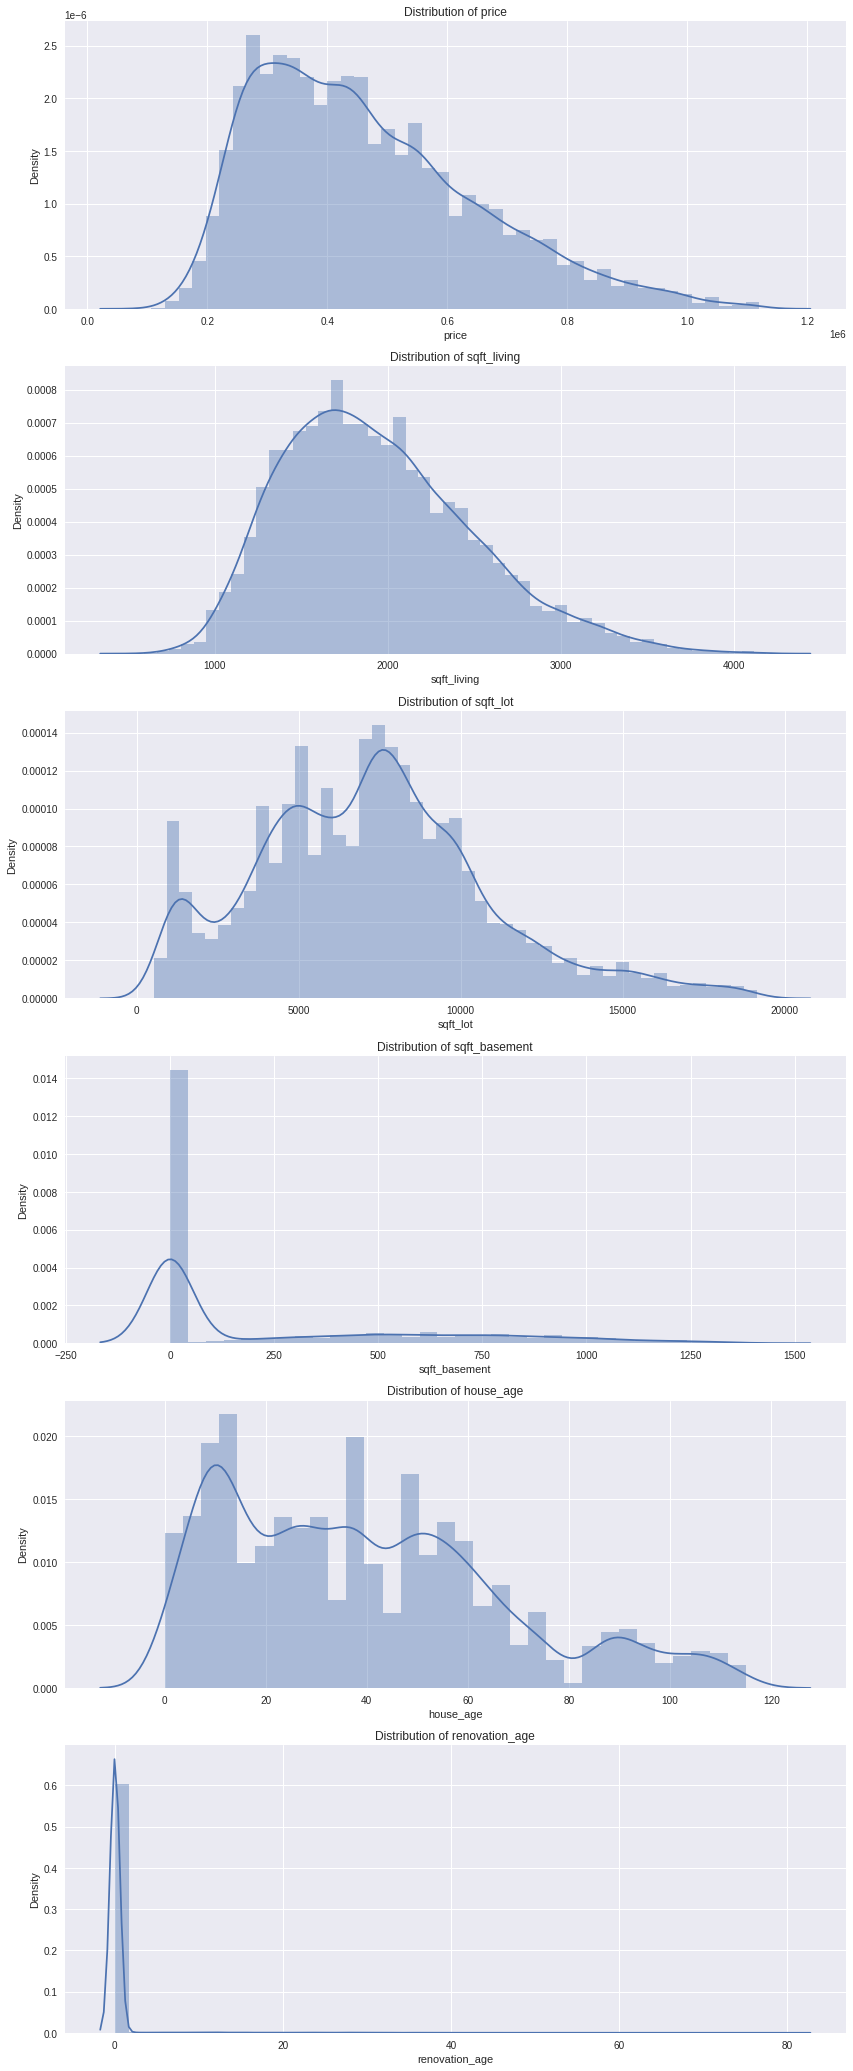

In [134]:
#ditributions of continous variables
continous = ['price','sqft_living','sqft_lot','sqft_basement','house_age','renovation_age']
#creating a function 
def distribution (df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(14,37))
    for i,cols in enumerate(list_names):
        sns.distplot(df[cols],ax=ax[i],kde = True) 
        ax[i].set_title('Distribution of '+format(cols))

distribution(data,continous)    

In [133]:
data.sqft_basement.value_counts()

0.0      7338
500.0     142
600.0     138
700.0     132
800.0     126
         ... 
20.0        1
276.0       1
556.0       1
784.0       1
862.0       1
Name: sqft_basement, Length: 165, dtype: int64